In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
URL = "https://www.worldometers.info/coronavirus/"
page= requests.get(URL)
page

<Response [200]>

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"
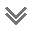

In [3]:
soup = BeautifulSoup(page.text, "lxml")
soup

In [4]:
table1 = soup.find('table', id = 'main_table_countries_today')
table1

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [5]:
headers=[]
for i in table1.find_all('th'):
    title=i.text
    headers.append(title)
headers

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [6]:
df=pd.DataFrame(columns=headers)

In [7]:
for j in table1.find_all('tr')[1:]:
    row_data=j.find_all('td')
    row=[i.text for i in row_data]
    length=len(df)
    df.loc[length]=row

In [8]:
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,\nNorth America\n,"114,689,887","+1,019","1,526,246",+5,"108,543,269","+7,180","4,620,372","9,090",...,,,,North America,\n,,,,,
1,,\nAsia\n,"184,944,461","+192,551","1,469,946",+456,"176,895,095","+406,532","6,579,420","12,447",...,,,,Asia,\n,,,,,
2,,\nEurope\n,"222,320,948","+64,173","1,905,046",+252,"216,319,185","+163,962","4,096,717","9,098",...,,,,Europe,\n,,,,,
3,,\nSouth America\n,"63,737,068","+4,031","1,326,180",+30,"61,760,719","+11,246","650,169","10,505",...,,,,South America,\n,,,,,
4,,\nOceania\n,"12,196,867","+10,421","19,642",+15,"11,982,469","+1,697","194,756",144,...,,,,Australia/Oceania,\n,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,,Total:,"63,737,068","+4,031","1,326,180",+30,"61,760,719","+11,246","650,169","10,505",...,,,,South America,,,,,,
242,,Total:,"12,196,867","+10,421","19,642",+15,"11,982,469","+1,697","194,756",144,...,,,,Australia/Oceania,,,,,,
243,,Total:,"12,616,421",+253,"257,418",,"11,944,063",,"414,940","1,027",...,,,,Africa,,,,,,
244,,Total:,721,,15,,706,,0,0,...,,,,,,,,,,


In [9]:
df.to_csv('prducts.csv')